In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import scipy.stats
import pandas
import itertools
from mpl_toolkits import basemap
import mpl_toolkits.axes_grid1
import random
import datetime
import time
import os

degree_sign = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})
mp.rcParams['hatch.color'] = '0.5'

% matplotlib inline

# Set up lat/lon of locations of interest

In [2]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

Oroville_dam_lat = 39.5380
Oroville_dam_lon = 121.4831 # deg west
Oroville_dam_lon = 360 - Oroville_dam_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

# Import coastal grid point indices

In [3]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

# Specify return period information and percentiles

In [4]:
#return_period = 200 # in years
#events_per_year = 151/40

return_period = 200
events_per_year = 151/40

return_val_perc = 100*(1-1/(return_period*events_per_year))
print(return_val_perc)

99.86754966887416


In [5]:
window=30
half_window=int(window/2)

# Set up directories where data are stored

In [6]:
working_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/'
#save_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calculations/npy_files/'
#latlon_indices = numpy.load(working_dir + 'ccal_latlon_indices_array.npy'); region='ccal'
#latlon_indices = numpy.load(working_dir + 'ncal_latlon_indices_array.npy'); region='ncal'
#latlon_indices = numpy.load(working_dir + 'scal_latlon_indices_array.npy'); region='scal'

PRECT_lat = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lat.npy')
PRECT_lon = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lon.npy')

In [7]:
working_dir = '/Users/baird/google_drive/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/'
#threshold=0.0
threshold=0.1
#threshold=0.5
#threshold=1.0
#threshold=5.0
#threshold=10.0

# Import lat/lon information

In [8]:
PRECT_nlat = 26
PRECT_nlon = 25

latlon_indices = list(itertools.product(range(PRECT_nlat), range(PRECT_nlon)))
region = 'whole_domain'
window=30

days_per_season = 30+31+31+28+31

# Open PIC data

In [9]:
year_start_pic = 402 #time_subsets[chunk,0]
year_end_pic = 2200 #time_subsets[chunk,1]

# create season strings
years_pic = numpy.arange(year_start_pic, year_end_pic+1, 1).astype(numpy.int)
#half_years_pic = numpy.arange(year_start_pic+0.75, year_end_pic, 1)
#season_strings_pic = numpy.empty(years.size-1, dtype=numpy.str)

season_strings_pic = [str(years_pic[i])+'-'+str(years_pic[i+1]) for i in range(years_pic.size-1)]
member_strings_pic = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_pic=year_end_pic-year_start_pic

In [10]:
working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/whole_domain/'

# Save all events as a numpy array, and save return period values

# Open all PIC events (which have already been saved as a npy array)

In [11]:
all_events_pic = numpy.load('csv_files/all_events_pic.npy')

# Open return period calculations

In [12]:
return_period_values_pic_df = pandas.read_csv('csv_files/return_period_values_pic_df_update.csv')
return_period_values_pic = return_period_values_pic_df.values[:,1:]

# Open historical, RCP and place all data into a 4d array!

In [13]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]

In [14]:
year_start = 1920
year_end = 2100

year_start_list = numpy.arange(1920,2070)
year_end_list = numpy.arange(1950,2100)
year_middle_list = year_start_list+15

# create season strings
years = numpy.arange(year_start, year_end+1, 1).astype(numpy.int)
half_years_hist_rcp = numpy.arange(year_start+0.75, year_end, 1)
season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(year_start,year_end)]

thirty_yr_strings_hist_rcp = [str(year_start_list[i])+'-'+str(year_end_list[i]) for i in range(year_start_list.size)]
member_strings_hist_rcp = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_hist_rcp=year_end-year_start

In [15]:
all_events_hist_rcp_4d = numpy.load('csv_files/all_events_hist_rcp_4d.npy')

In [16]:
print(all_events_hist_rcp_4d.shape)

(650, 40, 180, 151)


In [17]:
event_count = numpy.load('csv_files/event_count.npy')

In [18]:
print(event_count.shape)


(650, 40, 180)


In [19]:
event_count_2d = event_count.reshape((PRECT_nlat,PRECT_nlon,40,180))

In [36]:
event_count_LA_40members = event_count_2d[9,17,:,:]
event_count_LA = numpy.sum(event_count_2d[9,17,:,:], axis=0)

In [37]:
pic_equivalent = 10/44.95

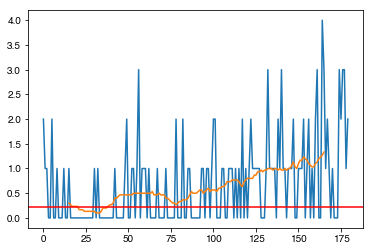

In [38]:
mp.plot(event_count_LA)
window = 30
event_count_LA_smooth = pandas.Series(event_count_LA).rolling(window=window, center=True).mean()
mp.plot(event_count_LA_smooth)
mp.axhline(pic_equivalent, c='red')

In [47]:
stdev_counts = numpy.std(event_count_LA_40members, axis=0)
stderr = (1./numpy.sqrt(180))*stdev_counts
stderr_smooth = pandas.Series(stderr).rolling(window=window, center=True).mean()

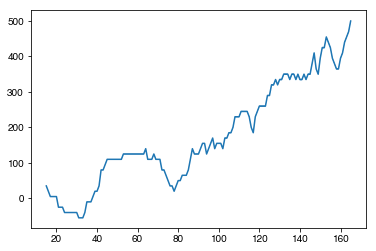

In [48]:
relative_change = (event_count_LA_smooth - pic_equivalent) / pic_equivalent * 100
mp.plot(relative_change)
mp.fill_between(numpy.arange(relative_change.size), relative_change-1.96*stderr_smooth*100, relative_change+1.96*stderr_smooth*100.)

In [174]:
idx_2017_2018 = numpy.where(numpy.array((season_strings_hist_rcp))=='2017-2018')[0][0]
print(numpy.where(numpy.array((season_strings_hist_rcp))=='2017-2018')[0][0])
event_count_2017_2100 = event_count[:,:,idx_2017_2018:]
print(event_count_2017_2100.shape)

97
(650, 40, 83)


In [175]:
event_count_ens_mean = numpy.mean(event_count_2017_2100, axis=1)
event_count_year_sum = numpy.sum(event_count_ens_mean, axis=1)

In [176]:
event_count_year_sum_reshape = event_count_year_sum.reshape((PRECT_nlat, PRECT_nlon))

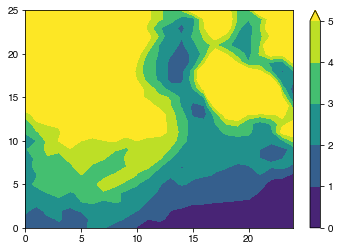

In [177]:
cf = mp.contourf(event_count_year_sum_reshape, levels=[0,1,2,3,4,5], extend='max')
mp.colorbar(cf)

# Create significance test

In [178]:
event_count_2017_2100.shape

(650, 40, 83)

In [179]:
event_count_across_years = numpy.sum(event_count_2017_2100, axis=2)
event_count_across_years_2d = event_count_across_years.reshape((PRECT_lat.size,PRECT_lon.size,40))

sig_test_gte_1 = numpy.sum(event_count_across_years>=1, axis=1)/40.
sig_test_gte_2 = numpy.sum(event_count_across_years>=2, axis=1)/40.

nmods_gte_1 = numpy.sum(event_count_across_years>=1, axis=1)
nmods_gte_2 = numpy.sum(event_count_across_years>=2, axis=1)

sig_test_gte_1_2d = sig_test_gte_1.reshape((PRECT_lat.size,PRECT_lon.size))
sig_test_gte_2_2d = sig_test_gte_2.reshape((PRECT_lat.size,PRECT_lon.size))

nmods_gte_1_2d = nmods_gte_1.reshape((PRECT_lat.size,PRECT_lon.size))
nmods_gte_2_2d = nmods_gte_2.reshape((PRECT_lat.size,PRECT_lon.size))

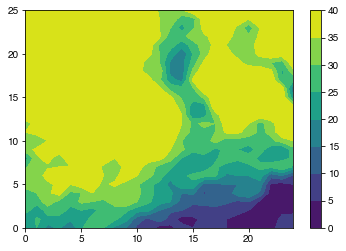

In [180]:
cf=mp.contourf(nmods_gte_2_2d)
mp.colorbar(cf)

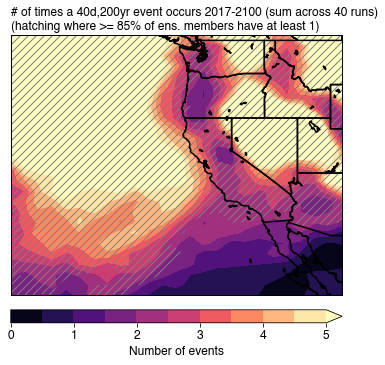

In [181]:
fontsize=12
contour_levels = numpy.arange(0,5.1,0.5)

fig = mp.figure(figsize=(5,5))

ax = fig.add_subplot(111)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

pr_map = map.contourf(xi, yi, event_count_year_sum_reshape, cmap='magma', levels=contour_levels, zorder=2, extend='max', latlon=True)

ax_sig = ax.contourf(xi, \
                    yi, \
                    sig_test_gte_1_2d, \
                    colors='None', \
                    levels=[0.0,0.85,1.0], \
                    hatches=[None,'///'], \
                    extend='lower', \
                    edgecolors='red', \
                    zorder=2)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('Number of events', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(contour_levels)

ax.text(s='# of times a 40d,200yr event occurs 2017-2100 (sum across 40 runs)\n(hatching where >= 85% of ens. members have at least 1)', x=0, y=1.01, transform=ax.transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.tight_layout()
mp.savefig('N_events_2017_2100_stippling_gte_1_event.pdf', transparent=True, bbox_inches='tight')

# plotting gte 2

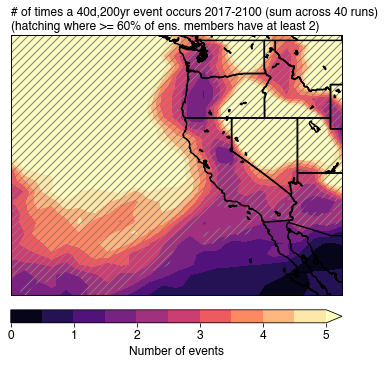

In [182]:
fontsize=12
contour_levels = numpy.arange(0,5.1,0.5)

fig = mp.figure(figsize=(5,5))

ax = fig.add_subplot(111)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

pr_map = map.contourf(xi, yi, event_count_year_sum_reshape, cmap='magma', levels=contour_levels, zorder=2, extend='max', latlon=True)

ax_sig = ax.contourf(xi, \
                    yi, \
                    sig_test_gte_2_2d, \
                    colors='None', \
                    levels=[0.0,0.6,1.0], \
                    hatches=[None,'///'], \
                    extend='lower', \
                    edgecolors='red', \
                    zorder=2)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('Number of events', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(contour_levels)

ax.text(s='# of times a 40d,200yr event occurs 2017-2100 (sum across 40 runs)\n(hatching where >= 60% of ens. members have at least 2)', x=0, y=1.01, transform=ax.transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.tight_layout()
mp.savefig('N_events_2017_2100_stippling_gte_2_events.pdf', transparent=True, bbox_inches='tight')

# Save netcdf file

In [183]:
# save hist clim
filename = '200yr_40d_N_event_map.nc'
if os.path.isfile(filename):
    os.remove(filename)
    print('removed '+filename)

ncfile = netCDF4.Dataset(filename, 'w', format='NETCDF4')

lat_dim = ncfile.createDimension('lat', PRECT_lat.size)
lon_dim = ncfile.createDimension('lon', PRECT_lon.size)
ens_dim = ncfile.createDimension('ens', 40)

lat_var = ncfile.createVariable('lat', 'f4', ('lat',))
lon_var = ncfile.createVariable('lon', 'f4', ('lon',))
lat_var[:] = PRECT_lat
lon_var[:] = PRECT_lon
lat_var.units = 'degrees_north'
lon_var.units = 'degrees_east'
ens_var = ncfile.createVariable('ens', 'S1', ('ens',))
ens_var[:] = ensemble_names

events_count = ncfile.createVariable('N_events_count_mean', 'f4', ('lat','lon',))
events_count[:] = event_count_year_sum_reshape
events_count.units = 'number of models'
events_count.description = 'Number of 200yr 40d events from 2017-2018 wet season onward in the NCAR Large Ensemble (averaged across 40 different realizations)'

n_gte_1_count = ncfile.createVariable('nmods_gte_1', 'f4', ('lat','lon',))
n_gte_1_count[:] = nmods_gte_1_2d[:]
n_gte_1_count.units = 'number of models'
n_gte_1_count.description = 'Number of ensemble members (out of 40 total) that have at least one 200yr 40d event after 2017-2018'

n_gte_2_count = ncfile.createVariable('nmods_gte_2', 'f4', ('lat','lon',))
n_gte_2_count[:] = nmods_gte_2_2d[:]
n_gte_2_count.units = 'number of models'
n_gte_2_count.description = 'Number of ensemble members (out of 40 total) that have at least two 200yr 40d events after 2017-2018'

all_event_counts = ncfile.createVariable('individual_ens_member_counts', 'f4', ('ens','lat','lon'))
all_event_counts[:] = event_count_across_years_2d.transpose((2,0,1))
all_event_counts.units = 'number of events'
all_event_counts.description = 'Number of events for each ensemble member after 2017-2018 wet season'

ncfile.close()

removed 200yr_40d_N_event_map.nc
